In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import sympy as sym

In [106]:
x = Symbol('x')
y = Symbol('y')
k1 = Symbol('k1')
k1_inv = Symbol('k1_inv')
k2 = Symbol('k2')
k2_inv = Symbol('k2_inv')
k3 = Symbol('k3')
k3_inv = Symbol('k3_inv')
alpha = Symbol('alpha')

f1 = k1 * (1 - x - y) - k1_inv * x - k2 * x * (1 - x - y) ** 2
f2 = k3 * (1 - x - y)  - k3_inv * y
sol = solve((f1, f2), (k1, y))
k_expr = sol[0][0]
y_expr = sol[0][1]

In [107]:
sol

[(-x*(k1_inv*k3**2 + 2*k1_inv*k3*k3_inv + k1_inv*k3_inv**2 + k2*k3_inv**2*x**2 - 2*k2*k3_inv**2*x + k2*k3_inv**2)/(k3_inv*(k3 + k3_inv)*(x - 1)),
  -k3*(x - 1)/(k3 + k3_inv))]

In [8]:
a11 = sym.diff(f1, x)
a12 = sym.diff(f1, y)
a21 = sym.diff(f2, x)
a22 = sym.diff(f2, y)

k1_inv_expr_mult = solve(((a11 + a22).subs({k1 : k_expr})).subs({y : y_expr}), k1_inv)[0]
k1_inv_expr_neutral = solve(((a11 * a22 - a12 * a21).subs({k1 : k_expr})).subs({y : y_expr}), k1_inv)[0]

In [88]:
k_expr

-x*(k1_inv*k3**2 + 2*k1_inv*k3*k3_inv + k1_inv*k3_inv**2 + k2*k3_inv**2*x**2 - 2*k2*k3_inv**2*x + k2*k3_inv**2)/(k3_inv*(k3 + k3_inv)*(x - 1))

In [9]:
# alpha_val = 18
# k1_val = 0.012
k1_inv_val = 0.005
k2_val = 2
k3_val = 0.0032
k3_inv_val = 0.003

In [37]:
y_expr

-k3*(x - 1)/(k3 + k3_inv)

In [38]:
x_val = np.linspace(0.01, 0.987, 1000)
y_val = np.zeros(len(x_val))
k1_val = np.zeros(len(x_val))
trace = np.zeros(len(x_val))
det = np.zeros(len(x_val))
di = np.zeros(len(x_val))
x_sn, y_sn, k2_sn = [], [], []
x_det, y_det, k2_det = [], [], []
x_di, y_di, k2_di = [], [], []
for i in range(len(x_val)):
    y_val[i] = float(y_expr.subs({k3: k3_val, k3_inv:k3_inv_val, x: float(x_val[i])})) 
    k1_val[i] = float(k_expr.subs({k1: k1_val[i], k1_inv: k1_inv_val, k2: k2_val, k3: k3_val,k3_inv:k3_inv_val, x: float(x_val[i]), y: float(y_val[i])}))
    
    a11_val = float(a11.subs({k1: k1_val[i], k1_inv: k1_inv_val, k2: k2_val, k3: k3_val, x: float(x_val[i]),k3_inv:k3_inv_val, y: float(y_val[i])}))
    a22_val = float(a22.subs({k1: k1_val[i], k1_inv: k1_inv_val, k2: k2_val, k3: k3_val, x: float(x_val[i]),k3_inv:k3_inv_val, y: float(y_val[i])}))
    a12_val = float(a12.subs({k1: k1_val[i], k1_inv: k1_inv_val, k2: k2_val, k3: k3_val, x: float(x_val[i]),k3_inv:k3_inv_val, y: float(y_val[i])}))
    a21_val = float(a21.subs({k1: k1_val[i], k1_inv: k1_inv_val, k2: k2_val, k3: k3_val, x: float(x_val[i]),k3_inv:k3_inv_val, y: float(y_val[i])}))
    trace[i] = a11_val + a22_val
    det[i] = a11_val * a22_val - a12_val * a21_val
    di[i] = trace[i] ** 2 - 4 * det[i]
    if i != 0:
        if trace[i] * trace[i - 1] <= 0:
            x_sn.append(x_val[i])
            y_sn.append(y_val[i])
            k2_sn.append(k1_val[i])
        if det[i] * det[i - 1] <= 0:
            x_det.append(x_val[i])
            y_det.append(y_val[i])
            k2_det.append(k1_val[i])
        if di[i] * di[i - 1] <= 0:
            x_di.append(x_val[i])
            y_di.append(y_val[i])
            k2_di.append(k1_val[i])


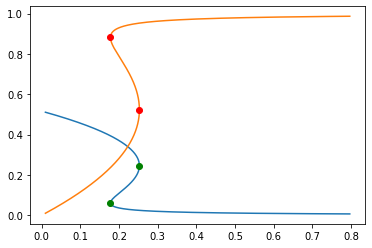

In [41]:
plt.plot(k1_val, y_val)
plt.plot(k1_val, x_val)

plt.plot(k2_det, y_det, 'go')
plt.plot(k2_det, x_det, 'ro')


In [30]:
k1_inv_expr_mult

k3_inv*(k2*k3_inv**2*x*(x - 1)**2 - k2*k3_inv**2*(x - 1)**2 + k2*k3_inv*x**3*(k3 + k3_inv) - 2*k2*k3_inv*x**2*(k3 + k3_inv) + k2*k3_inv*x*(k3 + k3_inv) + k3*x*(k3 + k3_inv)**2 - k3*(k3 + k3_inv)**2 + k3_inv*x*(k3 + k3_inv)**2 - k3_inv*(k3 + k3_inv)**2)/((k3 + k3_inv)*(k3**2*x + 2*k3*k3_inv*x + k3_inv**2*x - k3_inv*x*(k3 + k3_inv) + k3_inv*(k3 + k3_inv)))

In [43]:
k_expr

-x*(k1_inv*k3**2 + 2*k1_inv*k3*k3_inv + k1_inv*k3_inv**2 + k2*k3_inv**2*x**2 - 2*k2*k3_inv**2*x + k2*k3_inv**2)/(k3_inv*(k3 + k3_inv)*(x - 1))

In [44]:
x_val = np.linspace(0.01, 0.987, 1000)
y_val = np.zeros(len(x_val))
k1_val_fold = np.zeros(len(x_val))
k1_val_inv_fold = np.zeros(len(x_val))
for i in range(len(x_val)):
    k1_val_inv_fold[i] = float(k1_inv_expr_mult.subs({k3_inv: k3_inv_val, k2:k2_val, k3: k3_val, x: float(x_val[i])}))
    y_val[i] = float(y_expr.subs({k3: k3_val, k3_inv:k3_inv_val, x: float(x_val[i])}))
    k1_val_fold[i] = float(k_expr.subs({k1_inv: k1_val_inv_fold[i], k2: k2_val, k3: k3_val, k3_inv:k3_inv_val, x: float(x_val[i])}))
    

In [108]:
x_val = np.linspace(0.01, 0.987, 1000)
y_val = np.zeros(len(x_val))
k1_val_neutral = np.zeros(len(x_val))
k1_val_inv_neutral = np.zeros(len(x_val))
delt = k3_inv_val / (k3_inv_val + k3_val)
for i in range(len(x_val)):
        y_val[i] = (1 - x_val[i]) * (k3_val / (k3_val + k3_inv_val)) # float(y_expr.subs({k3: k3_val, k3_inv:k3_inv_val, x: float(x_val[i])}))
        k1_val_inv_neutral[i] = ((x_val[i] * delt  - (1 - x_val[i] - y_val[i]) ) * k2_val * (1 - x_val[i] - y_val[i]) ** 2) / (delt * x_val[i] + (1 - x_val[i] - y_val[i]))#(float(k1_inv_expr_neutral.subs({k3_inv: k3_inv_val, k2:k2_val, k3: k3_val, x: float(x_val[i])})))
        # k1_val_neutral[i] =  (k1_val_inv_neutral[i] * x_val[i] + k2_val * x_val[i] * (1 - x_val[i] - y_val[i]) ** 2) / (1 - x_val[i] - y_val[i])# 
        k1_val_neutral[i] = float(k_expr.subs({k1_inv: k1_val_inv_neutral[i], k2: k2_val, k3: k3_val, k3_inv:k3_inv_val, x: float(x_val[i]), y: float(y_val[i])}))


(0.0, 0.05)

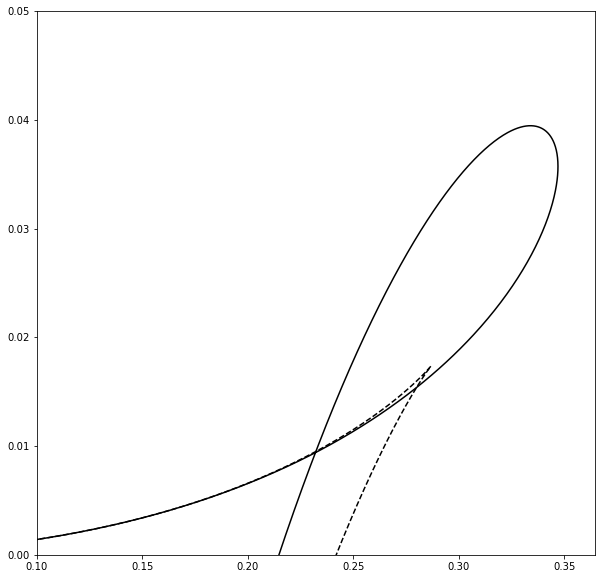

In [109]:
fig = plt.figure(figsize=(10,10))
plt.plot(k1_val_fold, k1_val_inv_fold, color='black', label='fold')

plt.plot(k1_val_neutral, k1_val_inv_neutral, color='black', linestyle='--', label='neutral')
#plt.legend()
plt.xlim(left=0.1)
plt.ylim([0.0, 0.05])
#plt.ylim([-0.2, 0.5])
#plt.plot(k1_val_fold, y_val, color='black', linestyle='--')

In [97]:
x_val[i] = 0.5
y_val[i] = (1 - x_val[i]) * (k3_val / (k3_val + k3_inv_val))
(k1_val_inv_neutral[i] * x_val[i] + k2_val * x_val[i] * (1 - x_val[i] - y_val[i]) ** 2) / (1 - x_val[i] - y_val[i])

0.24209478

In [102]:
float(k_expr.subs({k1_inv: k1_val_inv_neutral[i], k2: k2_val, k3: k3_val, k3_inv:k3_inv_val, x: float(x_val[i])}))

0.006709677419354798

In [103]:
k_expr

-k3*(x - 1)/(k3 + k3_inv)